In [11]:
#Importing libraries

In [65]:
pip install pandas-profiling

  Created wheel for phik: filename=phik-0.11.2-py3-none-any.whl size=1107420 sha256=a6cab12960ce620be25ec6543c28ee82d7799450866fa0955c45bc90258b5b9b
  Stored in directory: c:\users\user\appdata\local\pip\cache\wheels\72\9a\23\097c93fd8341220d92674891b6a9a30f0e389719d9b7291bd2
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27091 sha256=40cda2c414ccfd048c48b00e70cf3a5c0fd486b5b1a1ac66b538033615829e6f
  Stored in directory: c:\users\user\appdata\local\pip\cache\wheels\23\14\6e\4be5bfeeb027f4939a01764b48edd5996acf574b0913fe5243
Successfully built phik htmlmin
Note: you may need to restart the kernel to use updated packages.


In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.metrics import accuracy_score 
from sklearn.metrics import confusion_matrix, classification_report 
from sklearn.model_selection import train_test_split
from scipy.stats import zscore #to remove outliers
import requests
import io
import warnings
warnings.filterwarnings('ignore')
from pandas_profiling import ProfileReport

In [17]:
#Importing dataset

In [18]:
df = pd.read_csv("titanic_train.csv")

# eda

In [19]:
df.head(4)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S

In [20]:
df.shape # check the data dimension

(891, 12)

In [21]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [23]:
df.columns # check the column names for EDA

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [24]:
df.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

In [25]:
#Changing categorical data into numeric data

In [30]:
from sklearn.preprocessing import LabelEncoder

# creating instance of labelencoder
labelencoder = LabelEncoder()
# Assigning numerical values and storing in another column
df['Sex'] = labelencoder.fit_transform(df['Sex'])
df['Embarked'] = labelencoder.fit_transform(df['Embarked'])
df['Ticket'] = labelencoder.fit_transform(df['Ticket'])
df

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name  Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    1  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...    0  38.0      1   
2                               Heikkinen, Miss. Laina    0  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)    0  35.0      1   
4                             Allen, Mr. William Henry    1  35.0      0   
..                                                 ...  ...   ...    ...   
886                              Montvila, Rev. Juozas    1  27.0      0   
887                       Graham, Miss. Margaret Edith    0  19.0      0   
888           Johnston, Miss. Catherine Helen "Carrie"    0   NaN      1   
889                              Behr, Mr. Karl Howell    1  26.0      0   
890                                Dooley, Mr. Patrick    1  32.0      0   

     Parch  Ticket     Fare Cabin  Embarked  
0        0     523   7.2500   NaN         2  
1        0     596  71.2833   C85         0  
2        0     669   7.9250   NaN         2  
3        0      49  53.1000  C123         2  
4        0     472   8.0500   NaN         2  
..     ...     ...      ...   ...       ...  
886      0     101  13.0000   NaN         2  
887      0      14  30.0000   B42         2  
888      2     675  23.4500   NaN         2  
889      0       8  30.0000  C148         0  
890      0     466   7.7500   NaN         1  

[891 rows x 12 columns]

In [34]:
df['Ticket'].nunique() #check the number of unique values in Ticket column post label encoding

681

## handle null values

In [27]:
df.isna().sum() #checked for null values, there are no null values in the dataset

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [63]:
# percentage of missing values in cabin column
(687/884)*100

77.71493212669684

In [ ]:
#cabin column will be dropped

In [64]:
# percentage of missing values in age column
(177/884)*100

20.02262443438914

In [ ]:
# age column will be retained since 80% data is available

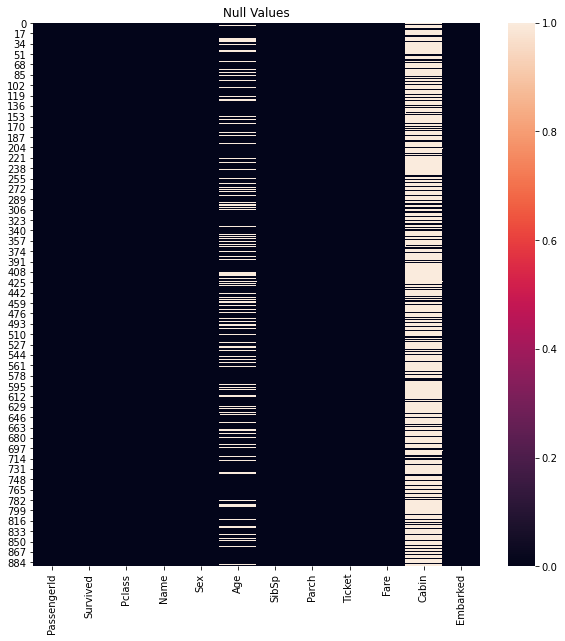

In [45]:
plt.figure(figsize = (10,10))
sns.heatmap(df.isnull())
plt.title("Null Values")
plt.show()

In [51]:
df['Age'].nunique()

88

In [52]:
df['Age'].unique()

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

<AxesSubplot:xlabel='Age', ylabel='Density'>

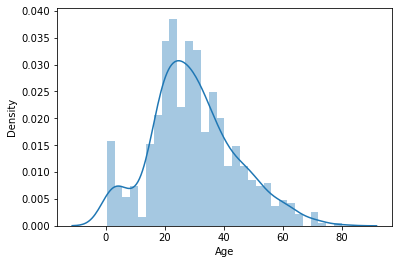

In [42]:
sns.distplot(df['Age'],kde=True,bins=30)

In [58]:
#data is not normally distributed, hence replacing null values with median
df['Age'] = df['Age'].fillna(value=df['Age'].median())

<AxesSubplot:xlabel='Age', ylabel='Density'>

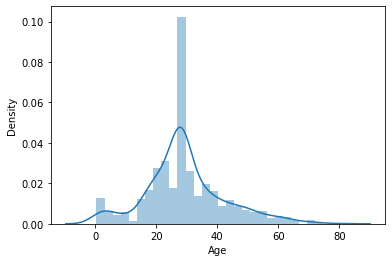

In [59]:
sns.distplot(df['Age'],kde=True,bins=30)

In [71]:
#Dropping the columns which are not required
df = df.drop(labels = 'Cabin', axis = 1)

In [73]:
df = df.drop(labels = 'Name', axis = 1)

In [74]:
df

PassengerId  Survived  Pclass  Sex   Age  SibSp  Parch  Ticket     Fare  \
0              1         0       3    1  22.0      1      0     523   7.2500   
1              2         1       1    0  38.0      1      0     596  71.2833   
2              3         1       3    0  26.0      0      0     669   7.9250   
3              4         1       1    0  35.0      1      0      49  53.1000   
4              5         0       3    1  35.0      0      0     472   8.0500   
..           ...       ...     ...  ...   ...    ...    ...     ...      ...   
886          887         0       2    1  27.0      0      0     101  13.0000   
887          888         1       1    0  19.0      0      0      14  30.0000   
888          889         0       3    0  28.0      1      2     675  23.4500   
889          890         1       1    1  26.0      0      0       8  30.0000   
890          891         0       3    1  32.0      0      0     466   7.7500   

     Embarked  
0           2  
1           0  
2           2  
3           2  
4           2  
..        ...  
886         2  
887         2  
888         2  
889         0  
890         1  

[891 rows x 10 columns]

In [77]:
df = df.rename(columns={'Survived': 'target'})

In [78]:
df

PassengerId  target  Pclass  Sex   Age  SibSp  Parch  Ticket     Fare  \
0              1       0       3    1  22.0      1      0     523   7.2500   
1              2       1       1    0  38.0      1      0     596  71.2833   
2              3       1       3    0  26.0      0      0     669   7.9250   
3              4       1       1    0  35.0      1      0      49  53.1000   
4              5       0       3    1  35.0      0      0     472   8.0500   
..           ...     ...     ...  ...   ...    ...    ...     ...      ...   
886          887       0       2    1  27.0      0      0     101  13.0000   
887          888       1       1    0  19.0      0      0      14  30.0000   
888          889       0       3    0  28.0      1      2     675  23.4500   
889          890       1       1    1  26.0      0      0       8  30.0000   
890          891       0       3    1  32.0      0      0     466   7.7500   

     Embarked  
0           2  
1           0  
2           2  
3           2  
4           2  
..        ...  
886         2  
887         2  
888         2  
889         0  
890         1  

[891 rows x 10 columns]

In [79]:
profile = ProfileReport(df, title="Pandas Profiling Report")

In [80]:
profile

## check for outliers

In [81]:
#remove outliers before skewness check and before x, y split

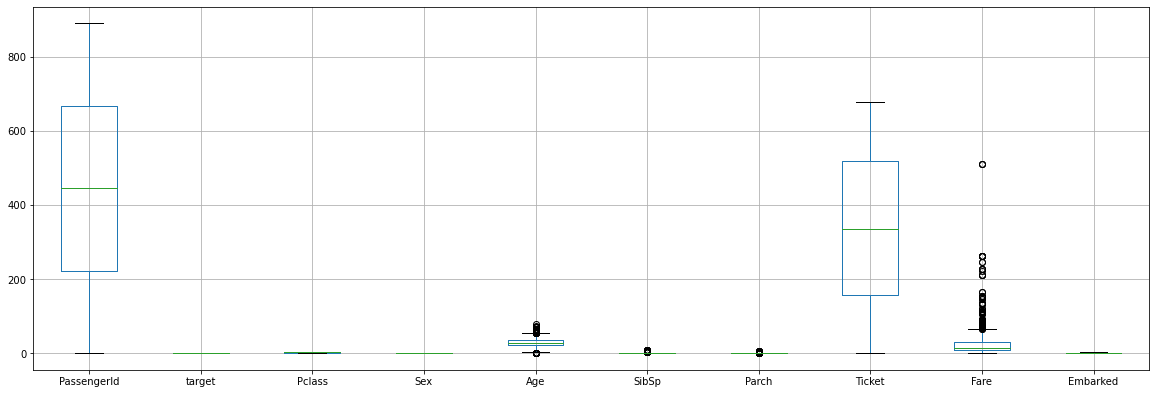

In [82]:
df.boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

In [83]:
#Removing outliers by z score

In [84]:
from scipy.stats import zscore
z = np.abs(zscore(df))
new_df = df[(z<3).all(axis=1)]

In [85]:
new_df.shape

(820, 10)

In [86]:
df.shape

(891, 10)

In [87]:
dataloss = ((891-820)/891)*100

In [88]:
dataloss

7.968574635241302

In [89]:
#Outliers are not removed since data loss is more than 7%.

## check co-relation

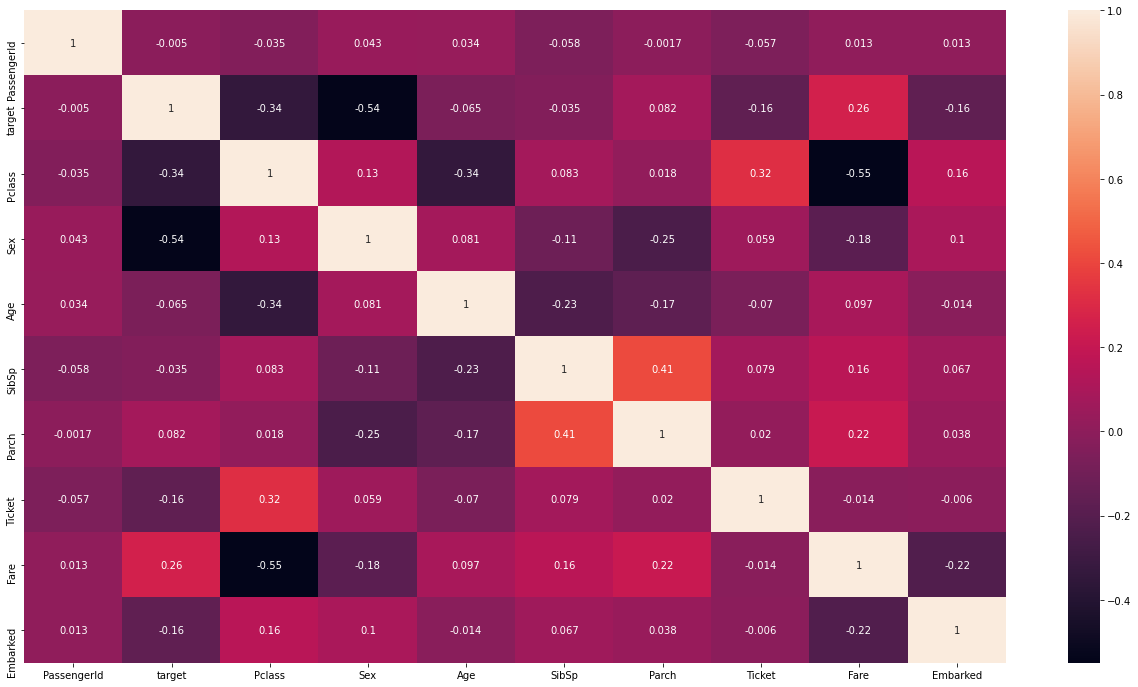

In [90]:
plt.figure(figsize=[22,12])
cor = df.corr()
sns.heatmap(cor, annot = True)
plt.show()

In [91]:
#Arrange co-relation in descending order. Dropping columns should be the last option to prevent data loss.

In [41]:
cor["target"].sort_values(ascending=False)

Rings             1.000000
Shell weight      0.622872
Height            0.612540
Diameter          0.584978
Length            0.567074
Whole weight      0.548295
Viscera weight    0.522917
Shucked weight    0.440424
Sex              -0.033272
Name: Rings, dtype: float64

In [42]:
df.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

In [43]:
columns = ['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings']

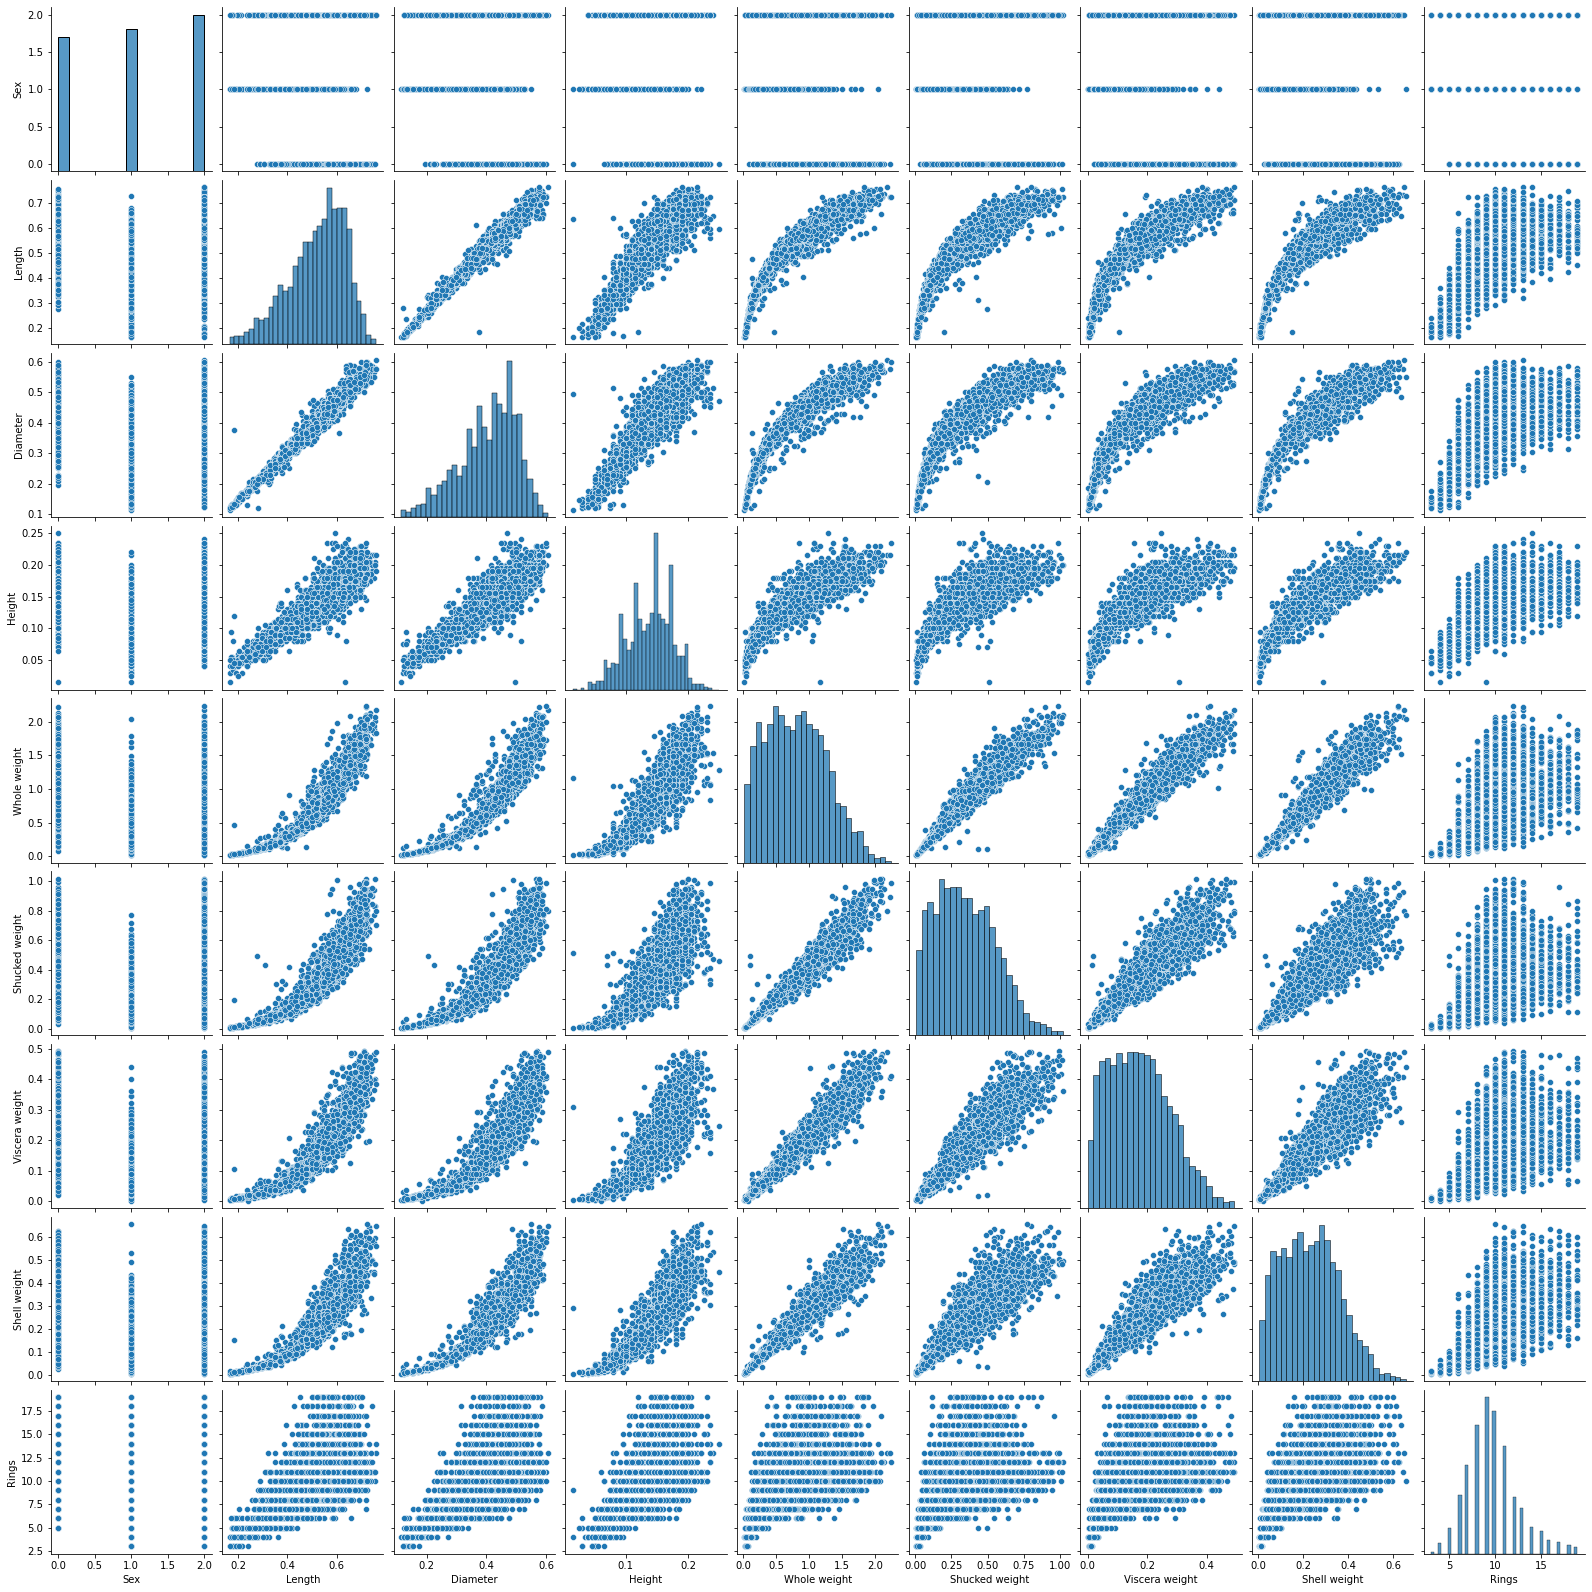

In [44]:
sns.pairplot(df[columns])

## check for skewness

In [92]:
x = df.drop('target',axis=1)
y = df['target']

In [93]:
x.skew() # check skewness

PassengerId    0.000000
Pclass        -0.630548
Sex           -0.618921
Age            0.510245
SibSp          3.695352
Parch          2.749117
Ticket         0.000246
Fare           4.787317
Embarked      -1.246689
dtype: float64

In [94]:
from sklearn.preprocessing import power_transform
df_new = power_transform(x)

df_new = pd.DataFrame(df_new, columns = x.columns)

In [95]:
df_new.skew()

PassengerId   -0.283201
Pclass        -0.441438
Sex           -0.618921
Age            0.074644
SibSp          0.808608
Parch          1.228795
Ticket        -0.299695
Fare          -0.040329
Embarked      -0.861651
dtype: float64

In [96]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: target, Length: 891, dtype: int64

## find best random state

In [98]:
#for classification problems

In [99]:
from sklearn.linear_model import LogisticRegression
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.30, random_state = i)
    LR = LogisticRegression()
    LR.fit(x_train, y_train)
    predLR = LR.predict(x_test)
    acc = accuracy_score(y_test, predLR)
    if acc>maxAccu:
        maxAccu = acc
        maxRS=i
print("Best accuracy is", maxAccu," on Random State ",maxRS)

Best accuracy is 0.8395522388059702  on Random State  6


In [ ]:
#We have found the best random state as 6. We will create our train_test_split using this random state.

## test train split

In [100]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=6)

## handle data imbalance

<AxesSubplot:xlabel='target', ylabel='count'>

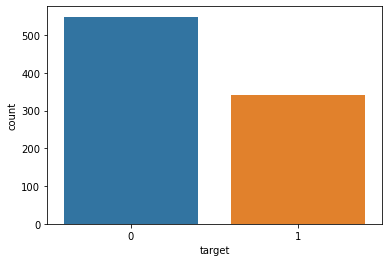

In [102]:
sns.countplot(df['target'])

In [104]:
y.value_counts()

0    549
1    342
Name: target, dtype: int64

### classification 

In [105]:
#logistic_regression

In [106]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(x_train, y_train)
predlr = LR.predict(x_test)

print(accuracy_score(y_test,predlr))
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

0.8395522388059702
[[159  15]
 [ 28  66]]
              precision    recall  f1-score   support

           0       0.85      0.91      0.88       174
           1       0.81      0.70      0.75        94

    accuracy                           0.84       268
   macro avg       0.83      0.81      0.82       268
weighted avg       0.84      0.84      0.84       268



In [107]:
#support vector machines

In [108]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train,y_train)
predsvc = svc.predict(x_test)

print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.7089552238805971
[[160  14]
 [ 64  30]]
              precision    recall  f1-score   support

           0       0.71      0.92      0.80       174
           1       0.68      0.32      0.43        94

    accuracy                           0.71       268
   macro avg       0.70      0.62      0.62       268
weighted avg       0.70      0.71      0.67       268



In [109]:
#decisiontree

In [110]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
preddt = dt.predict(x_test)

print(accuracy_score(y_test,preddt))
print(classification_report(y_test,preddt))
print(confusion_matrix(y_test,preddt))

0.7723880597014925
              precision    recall  f1-score   support

           0       0.83      0.82      0.82       174
           1       0.67      0.68      0.68        94

    accuracy                           0.77       268
   macro avg       0.75      0.75      0.75       268
weighted avg       0.77      0.77      0.77       268

[[143  31]
 [ 30  64]]


In [111]:
#random forest

In [112]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=1000)
rf.fit(x_train,y_train)
predrf = rf.predict(x_test)

print(accuracy_score(y_test,predrf))
print(classification_report(y_test,predrf))
print(confusion_matrix(y_test,predrf))

0.835820895522388
              precision    recall  f1-score   support

           0       0.86      0.90      0.88       174
           1       0.79      0.72      0.76        94

    accuracy                           0.84       268
   macro avg       0.82      0.81      0.82       268
weighted avg       0.83      0.84      0.83       268

[[156  18]
 [ 26  68]]


## check cross-validation scores

In [113]:
from sklearn.model_selection import cross_val_score

scr = cross_val_score(LR, x, y, cv=5)
print("CrossValidation Score of LogisticRegression Model: ", scr.mean())

CrossValidation Score of LogisticRegression Model:  0.7811813445483647


In [114]:
from sklearn.model_selection import cross_val_score

scr = cross_val_score(dt, x, y, cv=5)
print("CrossValidation Score of DecisionTree Model: ", scr.mean())

CrossValidation Score of DecisionTree Model:  0.7498650429979286


In [115]:
from sklearn.model_selection import cross_val_score

scr = cross_val_score(rf, x, y, cv=5)
print("CrossValidation Score of RandomForest Model: ", scr.mean())

CrossValidation Score of RandomForest Model:  0.831680371602536


In [116]:
from sklearn.model_selection import cross_val_score

scr = cross_val_score(svc, x, y, cv=5)
print("CrossValidation Score of SVC Model: ", scr.mean())

CrossValidation Score of SVC Model:  0.6633544661352081


In [117]:
#Model with least difference between Model accuracy and cross validation is selected as the best model
#LR -> 
84 - 78

6

In [118]:
# SVM -> 
71 - 66 

5

In [119]:
# DT -> 
77 - 75

2

In [120]:
# RF -> 
83  - 83 

0

## hyper parameter tuning

In [137]:
### Manual Hyperparameter Tuning
model=RandomForestClassifier(n_estimators=300,criterion='entropy',max_features='sqrt',min_samples_leaf=10,random_state=100).fit(x_train,y_train)
predictions=model.predict(x_test)
print(confusion_matrix(y_test,predictions))
print(accuracy_score(y_test,predictions))
print(classification_report(y_test,predictions))

[[161  13]
 [ 31  63]]
0.835820895522388
              precision    recall  f1-score   support

           0       0.84      0.93      0.88       174
           1       0.83      0.67      0.74        94

    accuracy                           0.84       268
   macro avg       0.83      0.80      0.81       268
weighted avg       0.84      0.84      0.83       268



In [138]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 1000,10)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10,14]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4,6,8]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['entropy','gini']}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [2, 5, 10, 14], 'min_samples_leaf': [1, 2, 4, 6, 8], 'criterion': ['entropy', 'gini']}


In [139]:
rf=RandomForestClassifier()
rf_randomcv=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,n_iter=100,cv=3,verbose=2,
                               random_state=100,n_jobs=-1)
### fit the randomized model
rf_randomcv.fit(x_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 14],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=100, verbose=2)

In [140]:
rf_randomcv.best_params_

{'n_estimators': 200,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'log2',
 'max_depth': 340,
 'criterion': 'entropy'}

In [141]:
rf_randomcv

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 14],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=100, verbose=2)

In [142]:
best_random_grid=rf_randomcv.best_estimator_

In [143]:
from sklearn.metrics import accuracy_score
y_pred=best_random_grid.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print("Classification report: {}".format(classification_report(y_test,y_pred)))

[[157  17]
 [ 27  67]]
Accuracy Score 0.835820895522388
Classification report:               precision    recall  f1-score   support

           0       0.85      0.90      0.88       174
           1       0.80      0.71      0.75        94

    accuracy                           0.84       268
   macro avg       0.83      0.81      0.81       268
weighted avg       0.83      0.84      0.83       268



## Grid Search CV

In [144]:
rf_randomcv.best_params_

{'n_estimators': 200,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'log2',
 'max_depth': 340,
 'criterion': 'entropy'}

In [145]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'criterion': [rf_randomcv.best_params_['criterion']],
    'max_depth': [rf_randomcv.best_params_['max_depth']],
    'max_features': [rf_randomcv.best_params_['max_features']],
    'min_samples_leaf': [rf_randomcv.best_params_['min_samples_leaf'], 
                         rf_randomcv.best_params_['min_samples_leaf']+2, 
                         rf_randomcv.best_params_['min_samples_leaf'] + 4],
    'min_samples_split': [rf_randomcv.best_params_['min_samples_split'] - 2,
                          rf_randomcv.best_params_['min_samples_split'] - 1,
                          rf_randomcv.best_params_['min_samples_split'], 
                          rf_randomcv.best_params_['min_samples_split'] +1,
                          rf_randomcv.best_params_['min_samples_split'] + 2],
    'n_estimators': [rf_randomcv.best_params_['n_estimators'] - 200, rf_randomcv.best_params_['n_estimators'] - 100, 
                     rf_randomcv.best_params_['n_estimators'], 
                     rf_randomcv.best_params_['n_estimators'] + 100, rf_randomcv.best_params_['n_estimators'] + 200]
}

print(param_grid)

{'criterion': ['entropy'], 'max_depth': [340], 'max_features': ['log2'], 'min_samples_leaf': [2, 4, 6], 'min_samples_split': [0, 1, 2, 3, 4], 'n_estimators': [0, 100, 200, 300, 400]}


In [146]:
#### Fit the grid_search to the data
rf=RandomForestClassifier()
grid_search=GridSearchCV(estimator=rf,param_grid=param_grid,cv=10,n_jobs=-1,verbose=2)
grid_search.fit(x_train,y_train)

Fitting 10 folds for each of 75 candidates, totalling 750 fits


GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['entropy'], 'max_depth': [340],
                         'max_features': ['log2'],
                         'min_samples_leaf': [2, 4, 6],
                         'min_samples_split': [0, 1, 2, 3, 4],
                         'n_estimators': [0, 100, 200, 300, 400]},
             verbose=2)

In [147]:
grid_search.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=340, max_features='log2',
                       min_samples_leaf=2, min_samples_split=3,
                       n_estimators=400)

In [148]:
best_grid=grid_search.best_estimator_

In [149]:
best_grid

RandomForestClassifier(criterion='entropy', max_depth=340, max_features='log2',
                       min_samples_leaf=2, min_samples_split=3,
                       n_estimators=400)

In [150]:
y_pred=best_grid.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print("Classification report: {}".format(classification_report(y_test,y_pred)))

[[157  17]
 [ 28  66]]
Accuracy Score 0.832089552238806
Classification report:               precision    recall  f1-score   support

           0       0.85      0.90      0.87       174
           1       0.80      0.70      0.75        94

    accuracy                           0.83       268
   macro avg       0.82      0.80      0.81       268
weighted avg       0.83      0.83      0.83       268



## saving the model

In [104]:
import joblib
joblib.dump(best_grid, "model.pkl") #rename as per project name
prediction = model.predict(x_test)

## loading the saved model

In [ ]:
model = joblib.load("model.pkl")

In [ ]:
prediction = model.predict(x_test)

In [ ]:
print(accuracy_score(y_test,prediction)*100)

In [ ]:
prediction = pd.DataFrame(prediction) # converting into dataframe

In [ ]:
prediction.to_csv("Results.csv")